# DSC1022STR - Deep Learning
## DSC1022STR_Actividad 1_Deep Learning_Deep Vision

# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del alumno/a en el nombre del archivo.
- Las redes utilizadas deben estar entrenadas. La entrega de una red sin entrenar supondrá pérdida de puntos.
- Si se desea __evidenciar alguna métrica__ del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Es recomendable crear una última sección de texto en el Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

### **Estrategia 1: Red pre-entrenada (Desarrollo)**

#### Primera aproximación con vgg16

In [1]:
# Import the necessary packages
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# Importando el set de datos CIFAR100
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# para la red vgg16
from keras.applications import vgg16 as vgg
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 8s 0us/step


In [3]:
# CIFAR100 labelnames
labelNames = ['apple','aquarium_fish',
              'baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly',
              'camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup',
              'dinosaur','dolphin',
              'elephant',
              'flatfish','forest','fox',
              'girl',
              'hamster','house',
              'kangaroo','keyboard',
              'lamp','lawn_mower','leopard','lion','lizard','lobster',
              'man','maple_tree','motorcycle','mountain','mouse','mushroom',
              'oak_tree','orange','orchid','otter',
              'palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
              'rabbit','raccoon','ray','road','rocket','rose',
              'sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper',
              'table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle',
              'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

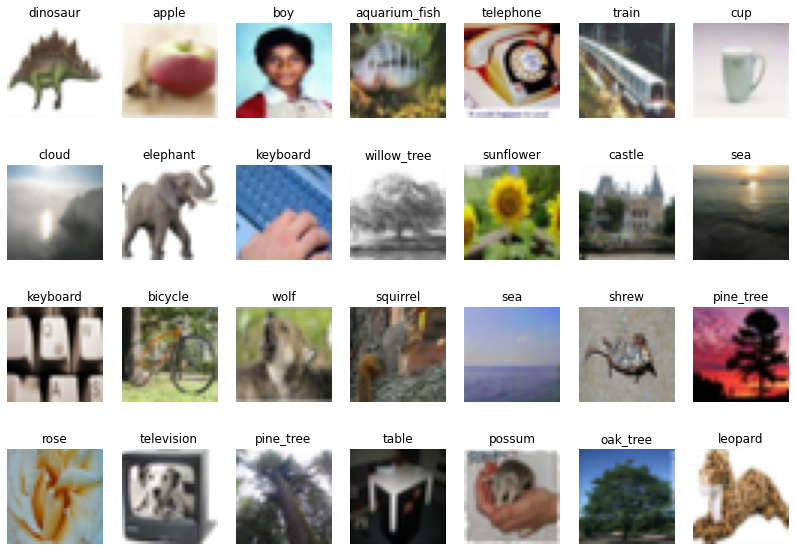

In [4]:
#tiene 100 clases que contienen 600 imágenes cada una.

#Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases. 
#Cada imagen viene con una etiqueta "fina" (la clase a la que pertenece) y
#una etiqueta "gruesa" (la superclase a la que pertenece).

# Visualizing some examples
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

In [5]:
def resize_img(images):
    tmp_images = []
    for image in images:
        tmp_image = cv2.resize(image, (48, 48), interpolation=cv2.INTER_CUBIC)
        tmp_image = tmp_image.astype("float") / 255.0
        tmp_images.append(tmp_image)

    return np.array(tmp_images)

In [6]:
# Preprocesado
trainX = resize_img(trainX)

In [7]:
testX = resize_img(testX)

In [8]:
print(trainX.shape)
print(trainY.shape)

(50000, 48, 48, 3)
(50000, 1)


In [9]:
# Convertimos a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [10]:
# Normalizamos
trainX = preprocess_input(trainX) 
testX = preprocess_input(testX) 

In [11]:
print(trainX.shape)
print(trainY.shape)

(50000, 48, 48, 3)
(50000, 100)


In [12]:
print("testX ",testX.shape)
print("testY ",testY.shape)

testX  (10000, 48, 48, 3)
testY  (10000, 100)


In [13]:
base_model = vgg.VGG16(weights='imagenet',
                 include_top=False,
                 pooling='max',
                 input_shape=(48,48,3))
 
base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [14]:
# Congelamos las capas deseadas
for layer in base_model.layers:
  if layer.name == 'block_4_expand':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 

Capa input_1 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...
Capa block3_conv1 congelada...
Capa block3_conv2 congelada...
Capa block3_conv3 congelada...
Capa block3_pool congelada...
Capa block4_conv1 congelada...
Capa block4_conv2 congelada...
Capa block4_conv3 congelada...
Capa block4_pool congelada...
Capa block5_conv1 congelada...
Capa block5_conv2 congelada...
Capa block5_conv3 congelada...
Capa block5_pool congelada...
Capa global_max_pooling2d congelada...


In [15]:
# Cogemos la última capa del model y 
# le añadimos nuestro clasificador (Top Model)
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(128, activation='relu', name='Top_Model')(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
#x = Dropout(0.1)(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 

model_aug_vgg_VGG16 = Model(base_model.input, x) 

In [16]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug_vgg_VGG16.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.0001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-08),
                  metrics=["accuracy"]) 

[INFO]: Compilando el modelo...


In [17]:
# Vamos a visualizar el modelo prestando especial atención en el número de
# pesos total y el número de pesos entrenables.
model_aug_vgg_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [18]:
early_stopping_vgg16 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   restore_best_weights=True)

In [19]:
# Vamos a mejorar el overfting con data augmentation

datagen = ImageDataGenerator(#rescale=1.0/255., #reescalado
                             rotation_range=15, # grados de rotación aleatoria
                             width_shift_range=0.1, # fracción del total (1) para mover la imagen
                             height_shift_range=0.1, # fracción del total (1) para mover la imagen
                             shear_range=0.1, # deslizamiento
                             zoom_range=0.2, # rango de zoom
                             fill_mode='nearest', # como rellenar posibles nuevos píxeles
                             horizontal_flip=True, # girar las imágenes horizontalmente (eje vertical)
                             validation_split=0.2) # set validation split

In [21]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagen.flow(
  trainX, 
  trainY, 
  batch_size=128, 
  subset= 'training'
)

validation_generator = datagen.flow(
  trainX, 
  trainY, 
  batch_size=128, 
  subset= 'validation'
)
  
data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real

H_aug = model_aug_vgg_VGG16.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//128,   # nº de muestras/batchsize
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//128,
            workers = data_aug_factor, # nº máximo de procesos en paralelo para el preprocesamiento de datos
            epochs = 50,
            callbacks=[early_stopping_vgg16]
            )

[INFO]: Entrenando la red...
Epoch 1/50
625/625 [==============================] - 128s 183ms/step - loss: 4.5403 - accuracy: 0.0296 - val_loss: 4.8123 - val_accuracy: 0.0145
Epoch 2/50
625/625 [==============================] - 131s 209ms/step - loss: 4.3636 - accuracy: 0.0506 - val_loss: 4.6171 - val_accuracy: 0.0310
Epoch 3/50
625/625 [==============================] - 110s 175ms/step - loss: 4.2837 - accuracy: 0.0628 - val_loss: 4.5731 - val_accuracy: 0.0334
Epoch 4/50
625/625 [==============================] - 107s 171ms/step - loss: 4.2299 - accuracy: 0.0693 - val_loss: 4.3059 - val_accuracy: 0.0560
Epoch 5/50
625/625 [==============================] - 103s 165ms/step - loss: 4.1928 - accuracy: 0.0755 - val_loss: 4.4106 - val_accuracy: 0.0378
Epoch 6/50
625/625 [==============================] - 107s 171ms/step - loss: 4.1665 - accuracy: 0.0785 - val_loss: 4.3560 - val_accuracy: 0.0492
Epoch 7/50
625/625 [==============================] - 102s 163ms/step - loss: 4.1423 - accuracy

In [22]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model_aug_vgg_VGG16.predict(testX, batch_size=128)

[INFO]: Evaluando el modelo...
79/79 [==============================] - 3s 31ms/step


In [23]:
# Obtener el report de clasificación
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            zero_division=0,
                            target_names=labelNames)) 

               precision    recall  f1-score   support

        apple       0.26      0.25      0.26       100
aquarium_fish       0.08      0.13      0.10       100
         baby       0.00      0.00      0.00       100
         bear       0.00      0.00      0.00       100
       beaver       0.00      0.00      0.00       100
          bed       0.50      0.01      0.02       100
          bee       0.00      0.00      0.00       100
       beetle       0.00      0.00      0.00       100
      bicycle       0.00      0.00      0.00       100
       bottle       0.15      0.05      0.07       100
         bowl       0.00      0.00      0.00       100
          boy       0.00      0.00      0.00       100
       bridge       0.00      0.00      0.00       100
          bus       0.10      0.06      0.07       100
    butterfly       0.04      0.06      0.05       100
        camel       0.00      0.00      0.00       100
          can       0.00      0.00      0.00       100
       ca

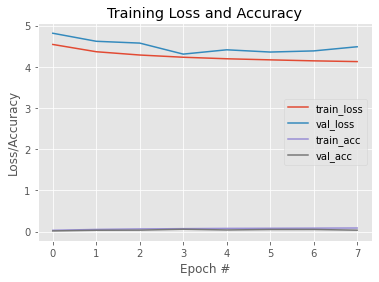

In [24]:

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 8), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 8), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 8), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 8), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Borrado de variables para poder lanzar la siguiente aproximación
del trainX, trainY, testX, testY, data_aug_factor, H_aug, early_stopping_vgg16
del predictions, train_generator, validation_generator, datagenPre
del last, x, labelNames, fig, last, lb, model_aug_vgg_VGG16

#### Aproximación mejorada con mobileNetV2

In [ ]:
# Import the necessary packages
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# Importando el set de datos CIFAR100
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# para la red MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import MobileNetV2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Directorio para alojar los h5
BASE_FOLDER = '/content/drive/MyDrive/colab/'

#### - Cargando el conjunto de datos

In [ ]:
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

[INFO]: Loading CIFAR-100 data...


Analizamos las etiquetas CIFAR100

In [ ]:
# CIFAR100 labelnames
labelNames = ['apple','aquarium_fish',
              'baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly',
              'camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup',
              'dinosaur','dolphin',
              'elephant',
              'flatfish','forest','fox',
              'girl',
              'hamster','house',
              'kangaroo','keyboard',
              'lamp','lawn_mower','leopard','lion','lizard','lobster',
              'man','maple_tree','motorcycle','mountain','mouse','mushroom',
              'oak_tree','orange','orchid','otter',
              'palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
              'rabbit','raccoon','ray','road','rocket','rose',
              'sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper',
              'table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle',
              'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

Tiene 100 clases que contienen 600 imágenes cada una.

Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases. 
Cada imagen viene con una etiqueta "fina" (la clase a la que pertenece) y una etiqueta "gruesa" (la superclase a la que pertenece).

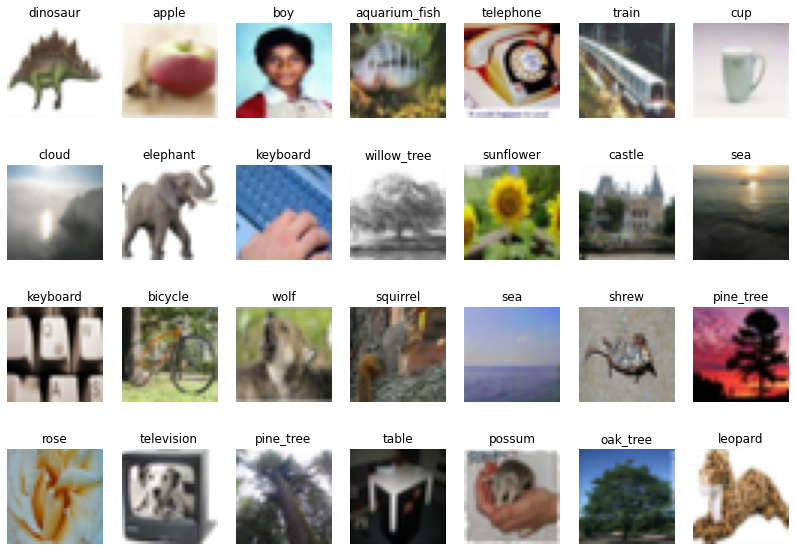

In [ ]:
# Visualizing some examples
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

In [ ]:
def resize_img(images):
    tmp_images = []
    for image in images:
        tmp_image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_CUBIC)
        tmp_images.append(tmp_image)

    return np.array(tmp_images)

#### - Acondicionando el conjunto de datos

In [ ]:
# Preprocesado
trainX = resize_img(trainX)

In [ ]:
testX = resize_img(testX)

In [ ]:
print(trainX.shape)
print(trainY.shape)

(50000, 96, 96, 3)
(50000, 1)


In [ ]:
# Convertimos a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar  en imageNet
trainX = preprocess_input(trainX) 
testX = preprocess_input(testX) 

In [ ]:
print(trainX.shape)
print(trainY.shape)

(50000, 96, 96, 3)
(50000, 100)


In [ ]:
print("testX ",testX.shape)
print("testY ",testY.shape)

testX  (10000, 96, 96, 3)
testY  (10000, 100)


#### - Cargando la tipología de red pre-entrenada MobileNetV2

In [ ]:
base_model = MobileNetV2(weights='imagenet',
                 include_top=False,
                 pooling='max',
                 alpha=1,
                 input_shape=(96,96,3))
 
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

In [ ]:
# Congelamos las capas deseadas
for layer in base_model.layers: 
  if layer.name == 'block_3_expand':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 

Capa input_1 congelada...
Capa Conv1 congelada...
Capa bn_Conv1 congelada...
Capa Conv1_relu congelada...
Capa expanded_conv_depthwise congelada...
Capa expanded_conv_depthwise_BN congelada...
Capa expanded_conv_depthwise_relu congelada...
Capa expanded_conv_project congelada...
Capa expanded_conv_project_BN congelada...
Capa block_1_expand congelada...
Capa block_1_expand_BN congelada...
Capa block_1_expand_relu congelada...
Capa block_1_pad congelada...
Capa block_1_depthwise congelada...
Capa block_1_depthwise_BN congelada...
Capa block_1_depthwise_relu congelada...
Capa block_1_project congelada...
Capa block_1_project_BN congelada...
Capa block_2_expand congelada...
Capa block_2_expand_BN congelada...
Capa block_2_expand_relu congelada...
Capa block_2_depthwise congelada...
Capa block_2_depthwise_BN congelada...
Capa block_2_depthwise_relu congelada...
Capa block_2_project congelada...
Capa block_2_project_BN congelada...
Capa block_2_add congelada...


El **BatchNormalization** consiste en adicionar una operacion despues de la funcion de activacion de cada hidden layer. Esta operación simplemente centra en cero y normaliza cada input, luego escala y cambia los resultados usando dos vectores de parámetros por hidden layer: uno para escalar y otro para cambiar. En otras palabras, la operación permite que el modelo aprenda la escala y la media óptimas de cada una de los inputs de la capa.
Para centrar en cero y normalizar los inputs, el algoritmo necesita estimar la media y la desviación standard de cada input. Esto lo hace evaluando la media y la desviación standard del input sobre cada mini-batch --> por eso BATCH NORMALIZATION. 

In [ ]:
# Cogemos la última capa del model y 
# le añadimos nuestro clasificador (Top Model).
last = base_model.layers[-1].output 
x = Flatten()(last) 
#x = Dense(512, activation='relu', name='Top_Model')(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.80)(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 

model = Model(base_model.input, x) 

**optimizador ADAM**:  método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden. Es una mejora tomando dos optimizadores:

1)el algoritmo del Gradiente Descendente con Momentum ( *Momentum, recuerda el incremento aplicado a los parámetros en cada iteración y determina la siguiente actualización como una combinación lineal entre el incremento de la actual iteración y el incremento anterior. Es decir, aplica a los incrementos cierta "inercia" de forma que varíen más lentamente*) usa la media móvil para evitar oscilaciones excesivas en los valores de los gradientes durante el entrenamiento.

2)el algoritmo RMSPROP incorpora un tamaño de paso variable, que permite acelerar o desacelerar el proceso de entrenamiento dependiendo de la magnitud del gradiente en cada iteración.

El algoritmo Adam incorpora estas dos ventajas. En particular, en cada iteración la actualización contiene un término asociado al momentum y otro que controla el tamaño del paso.

**Adamax**, una variante de Adam basada en la norma infinita, es un método de optimización de primer orden basado en el gradiente. Debido a su capacidad de ajustar la tasa de aprendizaje en función de las características de los datos, es adecuado para aprender procesos variables en el tiempo, por ejemplo, datos de voz con condiciones de ruido que cambian dinámicamente.

**beta_1**: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. *The exponential decay rate for the 1st moment estimates. Defaults to 0.9.*

**beta_2**:The exponential decay rate for the 2nd moment estimates. Defaults to 0.999.

**epsilon**:Una pequeña constante para la estabilidad numérica.

In [ ]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model.compile(loss="categorical_crossentropy",
                  optimizer=Adamax(learning_rate=0.00018,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-08),
                  metrics=["accuracy"]) 

[INFO]: Compilando el modelo...


In [ ]:
# Vamos a visualizar el modelo prestando especial atención en el número de
# pesos total y el número de pesos entrenables.
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

In [ ]:
early_stopping_pre = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=4,
                                                      restore_best_weights=True)

**early stopping callback**: creamos un callback con la función EarlyStopping, especificando que vamos a seguir el comportamiento del error de validación, y que después de observar el valor mínimo esperaremos cuatro iteraciones, y si este valor no se reduce detendremos el entrenamiento.

Con  restore_best_weights le indicamos a Keras que use los coeficientes de entrenamiento obtenidos en el punto mínimo alcanzado por el error.

#### - Creando un contenedor DataGenerator para el aumento automático de muestras

**Data Augmentation** aumenta artificialmente el tamaño del training set via variantes realistas de cada imagen. Esto reduce el overfitting --> técnica de regularización. Esto fuerza al modelo a ser mas tolerante a variaciones en posición, orientación y tamaño de los objetos en las imágenes.

In [ ]:
# Vamos a mejorar el overfting con data augmentation

datagenPre = ImageDataGenerator(#rescale=1.0/255., #reescalado
                                rotation_range=15, # grados de rotación aleatoria
                                width_shift_range=0.1, # fracción del total (1) para mover la imagen
                                height_shift_range=0.1, # fracción del total (1) para mover la imagen
                                #shear_range=0.1, # deslizamiento
                                #zoom_range=0.2, # rango de zoom
                                #fill_mode='nearest', # como rellenar posibles nuevos píxeles
                                horizontal_flip=True, # girar las imágenes horizontalmente (eje vertical)
                                validation_split=0.2) # set validation split

In [ ]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagenPre.flow(
  trainX, 
  trainY, 
  batch_size=32, 
  subset= 'training'
)

validation_generator = datagenPre.flow(
  trainX, 
  trainY, 
  batch_size=32, 
  subset= 'validation'
)
  
data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real

H_aug = model.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//32,   # nº de muestras/batchsize
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//32,
            workers = data_aug_factor, # nº máximo de procesos en paralelo para el preprocesamiento de datos
            epochs = 50,
            callbacks=[early_stopping_pre]
            )

[INFO]: Entrenando la red...
Epoch 1/50
2500/2500 [==============================] - 306s 110ms/step - loss: 4.5444 - accuracy: 0.2203 - val_loss: 1.5832 - val_accuracy: 0.5792
Epoch 2/50
2500/2500 [==============================] - 267s 107ms/step - loss: 2.4181 - accuracy: 0.4766 - val_loss: 1.2262 - val_accuracy: 0.6795
Epoch 3/50
2500/2500 [==============================] - 265s 106ms/step - loss: 1.8933 - accuracy: 0.5720 - val_loss: 1.1344 - val_accuracy: 0.7058
Epoch 4/50
2500/2500 [==============================] - 269s 108ms/step - loss: 1.5972 - accuracy: 0.6246 - val_loss: 1.0964 - val_accuracy: 0.7192
Epoch 5/50
2500/2500 [==============================] - 272s 109ms/step - loss: 1.4080 - accuracy: 0.6588 - val_loss: 1.0698 - val_accuracy: 0.7281
Epoch 6/50
2500/2500 [==============================] - 269s 108ms/step - loss: 1.2446 - accuracy: 0.6921 - val_loss: 1.0072 - val_accuracy: 0.7381
Epoch 7/50
2500/2500 [==============================] - 270s 108ms/step - loss: 1.1

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(testX, batch_size=32)

[INFO]: Evaluando el modelo...
313/313 [==============================] - 5s 12ms/step


In [ ]:
# Obtener el report de clasificación
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames)) 

               precision    recall  f1-score   support

        apple       0.89      0.93      0.91       100
aquarium_fish       0.91      0.86      0.88       100
         baby       0.75      0.59      0.66       100
         bear       0.69      0.74      0.71       100
       beaver       0.57      0.69      0.62       100
          bed       0.77      0.82      0.80       100
          bee       0.94      0.76      0.84       100
       beetle       0.85      0.82      0.84       100
      bicycle       0.86      0.92      0.89       100
       bottle       0.88      0.93      0.90       100
         bowl       0.64      0.62      0.63       100
          boy       0.62      0.58      0.60       100
       bridge       0.82      0.85      0.83       100
          bus       0.83      0.74      0.78       100
    butterfly       0.92      0.76      0.83       100
        camel       0.88      0.85      0.86       100
          can       0.93      0.78      0.85       100
       ca

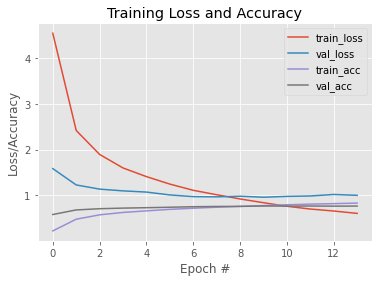

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 14), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 14), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 14), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 14), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Borrado de variables para poder lanzar la siguiente aproximación
del trainX, trainY, testX, testY, data_aug_factor, H_aug, early_stopping_pre
del predictions, train_generator, validation_generator, datagenPre
del last, x, model, labelNames, fig, last, lb

### **Estrategia 2: Entrenar desde cero o from scratch (Desarrollo)**

In [ ]:
# Import the necessary packages
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Importando el set de datos CIFAR100
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Analizando el conjunto de datos

In [ ]:
print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
# CIFAR100 labelnames
labelNames = ['apple','aquarium_fish',
              'baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly',
              'camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup',
              'dinosaur','dolphin',
              'elephant',
              'flatfish','forest','fox',
              'girl',
              'hamster','house',
              'kangaroo','keyboard',
              'lamp','lawn_mower','leopard','lion','lizard','lobster',
              'man','maple_tree','motorcycle','mountain','mouse','mushroom',
              'oak_tree','orange','orchid','otter',
              'palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
              'rabbit','raccoon','ray','road','rocket','rose',
              'sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper',
              'table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle',
              'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

Tiene 100 clases que contienen 600 imágenes cada una.

Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases. 
Cada imagen viene con una etiqueta "fina" (la clase a la que pertenece) y una etiqueta "gruesa" (la superclase a la que pertenece).

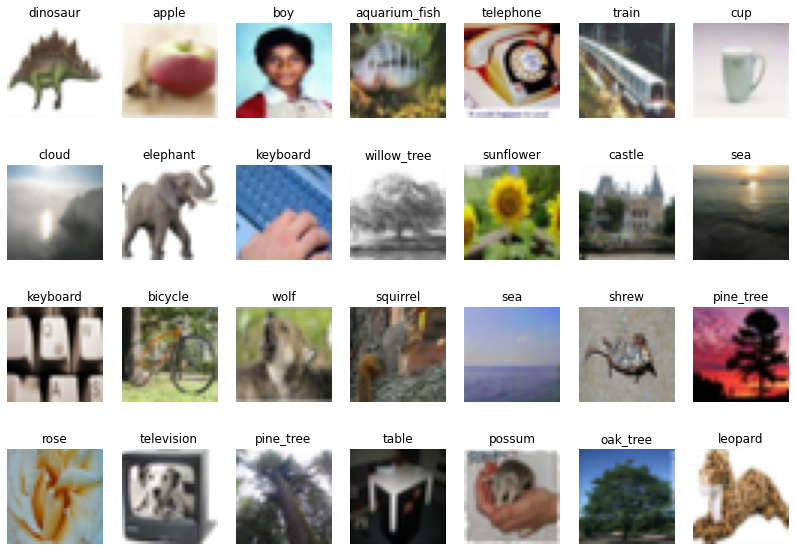

In [ ]:
# Visualizing some examples
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

#### Acondicionando el conjunto de datos

In [ ]:
# PREPROCESADO DE LOS DATOS
#La intensidad de los pixeles esta represenatada como un integer desde 0 a 255. Para simplificar, se escala esta
#intensidad a un rango entre 0 y 1. Ademas los convierte en un float porque se divide por 255.0
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainX.shape)
print(trainY.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainX.shape)
print(trainY.shape)

(50000, 32, 32, 3)
(50000, 100)


In [ ]:
print("testX ",testX.shape)
print("testY ",testY.shape)

testX  (10000, 32, 32, 3)
testY  (10000, 100)


#### - Creando un contenedor DataGenerator para el aumento automático de muestras

**Data Augmentation** aumenta artificialmente el tamaño del training set via variantes realistas de cada imagen. Esto reduce el overfitting --> técnica de regularización. Esto fuerza al modelo a ser mas tolerante a variaciones en posición, orientación y tamaño de los objetos en las imágenes.

In [ ]:
# Vamos a mejorar el overfting con data augmentation

datagen = ImageDataGenerator(#rescale=1.0/255., #reescalado
                             rotation_range=20, # grados de rotación aleatoria
                             width_shift_range=0.1, # fracción del total (1) para mover la imagen
                             height_shift_range=0.1, # fracción del total (1) para mover la imagen
                             #shear_range=0.1, # deslizamiento
                             #zoom_range=0.2, # rango de zoom
                             #fill_mode='nearest', # como rellenar posibles nuevos píxeles
                             horizontal_flip=True, # girar las imágenes horizontalmente (eje vertical)
                             validation_split=0.2) # set validation split

**Inspeccionamos las imagenes sintéticas**


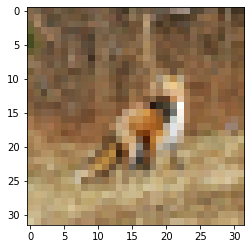

Label = fox


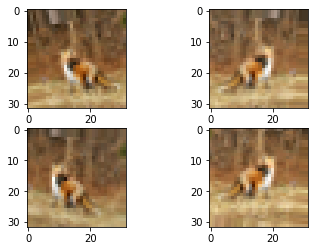

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 120
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

**Observaciones**:  Si bien inicializar con una RELU puede reducir significativamente el peligro de un problema de explosion de gradiente al principio del training, esto no garantiza que no suceda durante el training.
El **BatchNormalization** consiste en adicionar una operacion despues de la funcion de activacion de cada hidden layer. Esta operación simplemente centra en cero y normaliza cada input, luego escala y cambia los resultados usando dos vectores de parámetros por hidden layer: uno para escalar y otro para cambiar. En otras palabras, la operación permite que el modelo aprenda la escala y la media óptimas de cada una de los inputs de la capa.
Para centrar en cero y normalizar los inputs, el algoritmo necesita estimar la media y la desviación standard de cada innput. Esto lo hace evaluando la media y la desviación standard del input sobre cada mini-batch --> por eso BATCH NORMALIZATION. 
 - 

#### - Creando la topología de red neuronal y entrenamos

In [ ]:
#########################################
###### Definimos la arquitectura ########
#########################################
# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# BASE MODEL
# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)

In [ ]:
# Unimos las entradas y el modelo mediante la función Model
# con parámetros inputs y ouputs (Consultar la documentación)
model_aug = Model(inputs=inputs, outputs=predictions)
model_aug.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

**optimizador ADAM**:  método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden. Es una mejora tomando dos optimizadores:

1)el algoritmo del Gradiente Descendente con Momentum ( *Momentum, recuerda el incremento aplicado a los parámetros en cada iteración y determina la siguiente actualización como una combinación lineal entre el incremento de la actual iteración y el incremento anterior. Es decir, aplica a los incrementos cierta "inercia" de forma que varíen más lentamente*) usa la media móvil para evitar oscilaciones excesivas en los valores de los gradientes durante el entrenamiento.

2)el algoritmo RMSPROP incorpora un tamaño de paso variable, que permite acelerar o desacelerar el proceso de entrenamiento dependiendo de la magnitud del gradiente en cada iteración.

**Adamax**, una variante de Adam basada en la norma infinita, es un método de optimización de primer orden basado en el gradiente. Debido a su capacidad de ajustar la tasa de aprendizaje en función de las características de los datos, es adecuado para aprender procesos variables en el tiempo, por ejemplo, datos de voz con condiciones de ruido que cambian dinámicamente.

El algoritmo Adam incorpora estas dos ventajas. En particular, en cada iteración la actualización contiene un término asociado al momentum y otro que controla el tamaño del paso.

**beta_1**: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. *The exponential decay rate for the 1st moment estimates. Defaults to 0.9.*

**beta_2**:The exponential decay rate for the 2nd moment estimates. Defaults to 0.999.

**epsilon**:Una pequeña constante para la estabilidad numérica.

In [ ]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.001,
                                 beta_1=0.9, 
                                 beta_2=0.999,
                                 epsilon=1e-08),
                  metrics=["accuracy"]) 


[INFO]: Compilando el modelo...


**steps_per_epoch**: Número total de pasos (lotes de muestras) antes de declarar una época terminada y comenzar la próxima época



**early stopping callback**: creamos un callback con la función EarlyStopping, especificando que vamos a seguir el comportamiento del error de validación, y que después de observar el valor mínimo esperaremos cuatro iteraciones, y si este valor no se reduce detendremos el entrenamiento.

Con  restore_best_weights le indicamos a Keras que use los coeficientes de entrenamiento obtenidos en el punto mínimo alcanzado por el error.

In [ ]:
#early_stopping=tf.keras.callbacks.EarlyStopping(patience=10,
#                                                restore_best_weights=True)  

early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   restore_best_weights=True)
                                                  

In [ ]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagen.flow(
  trainX, 
  trainY, 
  batch_size=32, 
  subset= 'training'
)

validation_generator = datagen.flow(
  trainX, 
  trainY, 
  batch_size=32, 
  subset= 'validation'
)
  
data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real

H_aug = model_aug.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//32,   # nº de muestras/batchsize
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//32,
            workers = data_aug_factor, # nº máximo de procesos en paralelo para el preprocesamiento de datos
            epochs = 50,
            callbacks=[early_stopping2]
            )


[INFO]: Entrenando la red...
Epoch 1/50
2500/2500 [==============================] - 96s 32ms/step - loss: 3.8278 - accuracy: 0.1422 - val_loss: 3.3909 - val_accuracy: 0.1991
Epoch 2/50
2500/2500 [==============================] - 80s 32ms/step - loss: 2.9152 - accuracy: 0.2724 - val_loss: 2.5839 - val_accuracy: 0.3419
Epoch 3/50
2500/2500 [==============================] - 84s 34ms/step - loss: 2.5476 - accuracy: 0.3450 - val_loss: 2.2977 - val_accuracy: 0.4011
Epoch 4/50
2500/2500 [==============================] - 90s 36ms/step - loss: 2.3107 - accuracy: 0.3941 - val_loss: 2.1633 - val_accuracy: 0.4305
Epoch 5/50
2500/2500 [==============================] - 87s 35ms/step - loss: 2.1551 - accuracy: 0.4295 - val_loss: 2.0335 - val_accuracy: 0.4536
Epoch 6/50
2500/2500 [==============================] - 87s 35ms/step - loss: 2.0259 - accuracy: 0.4559 - val_loss: 2.0427 - val_accuracy: 0.4573
Epoch 7/50
2500/2500 [==============================] - 75s 30ms/step - loss: 1.9275 - accuracy

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_aug.predict(testX, batch_size=32)

[INFO]: Evaluando el modelo...
313/313 [==============================] - 1s 3ms/step


In [ ]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames)) 

               precision    recall  f1-score   support

        apple       0.92      0.80      0.86       100
aquarium_fish       0.82      0.75      0.78       100
         baby       0.59      0.47      0.53       100
         bear       0.55      0.35      0.43       100
       beaver       0.52      0.33      0.40       100
          bed       0.58      0.70      0.64       100
          bee       0.65      0.74      0.69       100
       beetle       0.56      0.62      0.59       100
      bicycle       0.79      0.62      0.70       100
       bottle       0.83      0.62      0.71       100
         bowl       0.49      0.41      0.45       100
          boy       0.49      0.37      0.42       100
       bridge       0.60      0.81      0.69       100
          bus       0.55      0.65      0.59       100
    butterfly       0.58      0.58      0.58       100
        camel       0.66      0.59      0.62       100
          can       0.53      0.63      0.57       100
       ca

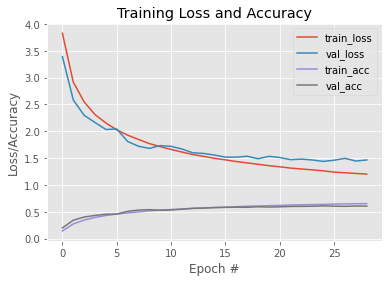

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 29), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 29), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 29), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 29), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Conclusiones


Comenzando hablando por la pre-entrenada, se ha utilizado mobileNetV2 y VGGs(vgg16), y la que nos ha dado mejor resultado ha sido mobileNetV2 con un shape de 96x96x3. En la vgg16 estuvimos haciendo mas pruebas con los parámetros data augmentation y congelando capas. Ya en mobileNetV2,  hemos mantenido congelado sólo hasta la tercera capa y las demás han sido reentrenadas. En top model hemos probrado varias casos y al final incluso se hizo uso de data augmentation para reducir overfitting. Con sólo 14 épocas ya teníamos mas de un 75% de accuracy. 

En cuanto a la creada desde cero, supone mas épocas; hay mas ciclos de computación y los resultados no son tan apreciables como la preentrenada con fine-tuning anterior. Ademas obteener mas accuracy en esta modalidad supone mas tiempo en diseño. 